In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn import datasets

D:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
iris = datasets.load_iris()
x_vals = np.array([x[0: 3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])
sess = tf.Session()

In [3]:
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)

In [4]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

In [5]:
train_x_vals = x_vals[train_indices]
train_y_vals = y_vals[train_indices]
test_x_vals = x_vals[test_indices]
test_y_vals = y_vals[test_indices]

In [6]:
def normalize_col(m):
    max_m = m.max(axis=0)
    min_m = m.min(axis=0)
    return (m - min_m) / (max_m - min_m)

In [7]:
train_x_vals = np.nan_to_num(normalize_col(train_x_vals))
test_x_vals = np.nan_to_num(normalize_col(test_x_vals))
batch_size = 50
x_data = tf.placeholder(dtype=tf.float32, shape=[None, 3])
y_data = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [8]:
hidden_layer_nodes = 5
weights1 = tf.Variable(tf.random_normal(shape=[3, hidden_layer_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))
weights2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes, 1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, weights1), b1))
my_outputs = tf.add(tf.matmul(hidden_output, weights2), b2)

In [10]:
print(np.transpose(np.array([train_x_vals])).shape)

(3, 120, 1)


In [11]:
loss = tf.reduce_mean(tf.square(tf.subtract(y_data, my_outputs)))
my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)
init = tf.global_variables_initializer()
sess.run(init)

In [12]:
loss_vec = []
test_loss = []
for i in range(500):
    rand_index = np.random.choice(len(train_x_vals), size=batch_size)
    rand_x = train_x_vals[rand_index]
    rand_y = np.transpose(np.array([train_y_vals[rand_index]]))
    sess.run(train_step, feed_dict={x_data: rand_x, y_data: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: train_x_vals, y_data: np.transpose(np.array([train_y_vals]))})
    loss_vec.append(np.sqrt(temp_loss))
    test_temp_loss = sess.run(loss, feed_dict={x_data: test_x_vals, y_data: np.transpose(np.array([test_y_vals]))})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i + 1) % 50 == 0:
        print('Generation: ' + str(i + 1) + '. Loss= ' + str(temp_loss))

Generation: 50. Loss= 1.7328687
Generation: 100. Loss= 0.86124575
Generation: 150. Loss= 0.7221639
Generation: 200. Loss= 0.6199324
Generation: 250. Loss= 0.5420206
Generation: 300. Loss= 0.47584203
Generation: 350. Loss= 0.4186671
Generation: 400. Loss= 0.37395528
Generation: 450. Loss= 0.3370959
Generation: 500. Loss= 0.3047591


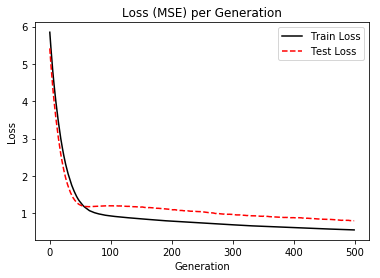

In [13]:
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()